In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

#Create lists for stored values
latitude =[]
temperature =[]
humidity =[]
wind_speed =[]
cloudiness =[]

#Test json for reference
response = requests.get(url + '&q=' + cities[0]).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 67.8, 'lon': 130.41},
 'dt': 1535235561,
 'id': 2027042,
 'main': {'grnd_level': 948.16,
          'humidity': 85,
          'pressure': 948.16,
          'sea_level': 1036.04,
          'temp': 31.87,
          'temp_max': 31.87,
          'temp_min': 31.87},
 'name': 'Batagay-Alyta',
 'sys': {'country': 'RU',
         'message': 0.0028,
         'sunrise': 1535138466,
         'sunset': 1535195809},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 307.503, 'speed': 2.71}}


In [4]:
#Create loop to request info for each city
c = 1
for city in cities:
    query_url = url + '&q=' + city
    response = requests.get(query_url).json()
    
    #Status Message
    print(f'Getting info for city {c}: {city}')
    c= c + 1
    
    #Append lists with information
    try:  
        latitude.append(response['coord']['lat'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        
    #Many cities weren't pulling from openweather. Created error message for those cases.
    except:
        print(f'ERROR: Could not find {city}. Skipping.')

#Print completion message with number of valid cities pulled.
print(f'Query Complete. {len(latitude)} valid cities found.')

Getting info for city 1: batagay-alyta
Getting info for city 2: svetlyy
ERROR: Could not find svetlyy. Skipping.
Getting info for city 3: barrow
Getting info for city 4: albany
Getting info for city 5: praia da vitoria
Getting info for city 6: cape town
Getting info for city 7: rikitea
Getting info for city 8: kodiak
Getting info for city 9: kapaa
Getting info for city 10: hobart
Getting info for city 11: coquimbo
Getting info for city 12: carnarvon
Getting info for city 13: butaritari
Getting info for city 14: khani
Getting info for city 15: pundaguitan
Getting info for city 16: cordoba
Getting info for city 17: santiago de cao
Getting info for city 18: punta arenas
Getting info for city 19: ushuaia
Getting info for city 20: sokoni
Getting info for city 21: saint-lo
Getting info for city 22: kostino
Getting info for city 23: mar del plata
Getting info for city 24: atuona
Getting info for city 25: panama city
Getting info for city 26: grindavik
Getting info for city 27: nikolskoye
Gett

Getting info for city 202: nanuque
Getting info for city 203: bomet
Getting info for city 204: zvishavane
Getting info for city 205: calaba
ERROR: Could not find calaba. Skipping.
Getting info for city 206: taoudenni
Getting info for city 207: tsihombe
ERROR: Could not find tsihombe. Skipping.
Getting info for city 208: victoria
Getting info for city 209: the valley
Getting info for city 210: varjota
Getting info for city 211: valuyki
Getting info for city 212: chuy
Getting info for city 213: tuktoyaktuk
Getting info for city 214: pevek
Getting info for city 215: korla
ERROR: Could not find korla. Skipping.
Getting info for city 216: moscow
Getting info for city 217: half moon bay
Getting info for city 218: geraldton
Getting info for city 219: nemuro
Getting info for city 220: saint-joseph
Getting info for city 221: puerto madryn
Getting info for city 222: amderma
ERROR: Could not find amderma. Skipping.
Getting info for city 223: bilibino
Getting info for city 224: provideniya
Getting

Getting info for city 408: mnogovershinnyy
Getting info for city 409: dubti
Getting info for city 410: hearst
Getting info for city 411: yantai
Getting info for city 412: sao joao da barra
Getting info for city 413: aguimes
Getting info for city 414: matameye
ERROR: Could not find matameye. Skipping.
Getting info for city 415: usvyaty
Getting info for city 416: sisimiut
Getting info for city 417: nome
Getting info for city 418: roswell
Getting info for city 419: salina
Getting info for city 420: thinadhoo
Getting info for city 421: taltal
Getting info for city 422: hofn
Getting info for city 423: manakara
Getting info for city 424: hohhot
Getting info for city 425: sioux lookout
Getting info for city 426: kamenskoye
ERROR: Could not find kamenskoye. Skipping.
Getting info for city 427: saint anthony
Getting info for city 428: ambilobe
Getting info for city 429: karasjok
Getting info for city 430: kuching
Getting info for city 431: kempele
Getting info for city 432: moerai
Getting info 

## Plotting Results

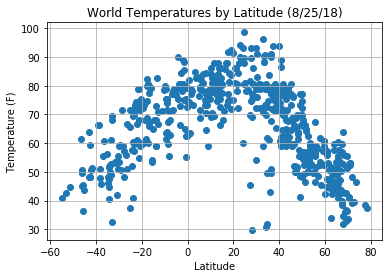

In [5]:
#Create temperature plot.
plt.scatter(latitude,temperature)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('World Temperatures by Latitude (8/25/18)')
plt.show()

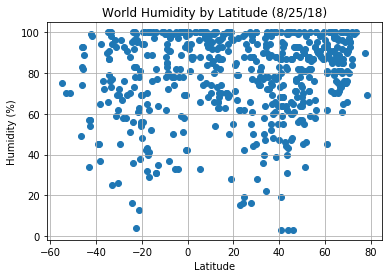

In [6]:
#Create humidity plot.
plt.scatter(latitude,humidity)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('World Humidity by Latitude (8/25/18)')
plt.show()

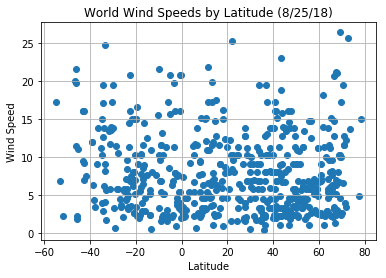

In [7]:
#Create wind speed plot.
plt.scatter(latitude,wind_speed)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('World Wind Speeds by Latitude (8/25/18)')
plt.show()

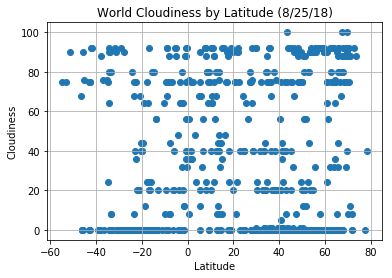

In [8]:
#Create cloudiness plot.
plt.scatter(latitude,cloudiness)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('World Cloudiness by Latitude (8/25/18)')
plt.show()